In [1]:
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
data = np.genfromtxt('./dados_tratados.csv', delimiter=',')

In [3]:
X = data[:, :-1]  
y = data[:, -1]

X_treino_full, X_teste_final, y_treino_full, y_teste_final = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y
)


In [4]:
# Pipeline com ROS + Escalonamento + Regressão Logística
pipeline = ImbPipeline([
    ('sampler', RandomOverSampler(random_state=2)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

# Grid de hiperparâmetros para LogisticRegression
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

In [ ]:
# GridSearchCV com validação cruzada
grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_treino_full, y_treino_full)

# Melhor modelo
print(f"Melhores parâmetros: {grid.best_params_}")
print(f"Acurácia no treino: {grid.best_score_:.4f}")


Melhores parâmetros: {'clf__C': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Acurácia no treino: 0.7436


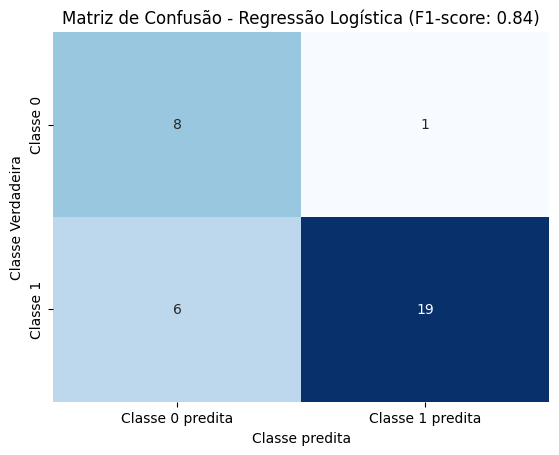

In [6]:
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve,
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, recall_score, precision_score, f1_score
)

import seaborn as sns

# Avaliação no teste
melhor_modelo = grid.best_estimator_
y_pred = melhor_modelo.predict(X_teste_final)

# MATRIZ DE CONFUSÃO
# =======================
y_pred = melhor_modelo.predict(X_teste_final)
cm = confusion_matrix(y_teste_final, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0 predita', 'Classe 1 predita'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Classe predita')
plt.ylabel('Classe Verdadeira')
plt.title(f"Matriz de Confusão - Regressão Logística (F1-score: {f1_score(y_teste_final, y_pred):.2f})")
plt.show()


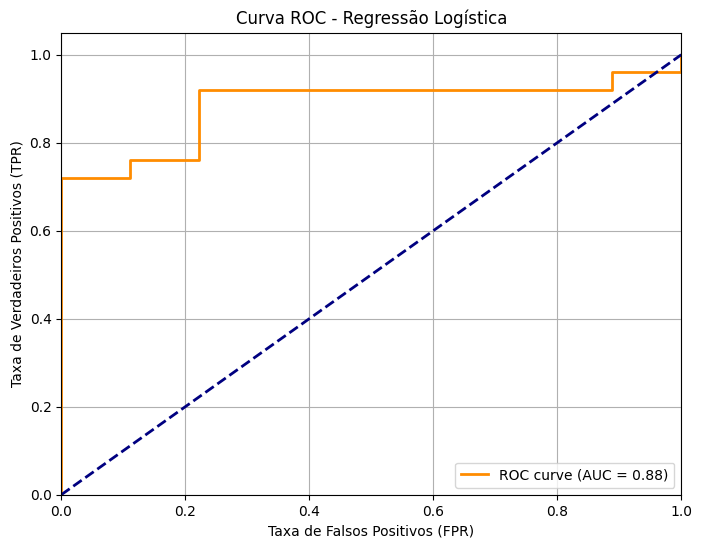

In [9]:
y_prob = melhor_modelo.predict_proba(X_teste_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_teste_final, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score
)

acc = accuracy_score(y_teste_final, y_pred)
recal = recall_score(y_teste_final, y_pred)
precis = precision_score(y_teste_final, y_pred)
f1 = f1_score(y_teste_final, y_pred)

print("Estatísticas regressao logistica:")

print(f"Acurácia: {acc:.4f}")
print(f"Revocação: {recal:.4f}")
print(f"Precisão: {precis:.4f}")
print(f"F1-score: {f1:.4f}")


Estatísticas regressao logistica:
Acurácia: 0.7941
Revocação: 0.7600
Precisão: 0.9500
F1-score: 0.8444
